Data cleaning,engineering and making it fit for model building

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
data=pd.read_csv(r"D:\My work\data cleaning\data\smartwatches.csv")
df=data
df.head(3)

,s.no,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,0,noise,82990.0,89900.0,7.686318,4.0,65.0,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.0,Yes,NaN,35 - 50 g
1,1,fire-boltt,3799.0,16999.0,77.651627,4.3,20788.0,BSW046,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,50 - 75 g
2,2,boat,1999.0,7990.0,74.981227,3.8,21724.0,Wave Call,NaN,NaN,Silicon,Yes,8.0,Yes,1.7 inches,35 - 50 g


Getting Insights from Data

In [3]:
df.isna().sum()#.sum()/df.shape[0]*df.shape[1]

s.no                     0
Brand                    0
Current Price           10
Original Price          73
Discount Percentage     73
Rating                   6
Number OF Ratings       59
Model Name              35
Dial Shape             123
Strap Color            123
Strap Material          69
Touchscreen             37
Battery Life (Days)     32
Bluetooth                6
Display Size            30
Weight                 186
dtype: int64

In [4]:
df.info(),df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   s.no                 450 non-null    int64  
 1   Brand                450 non-null    object 
 2   Current Price        440 non-null    float64
 3   Original Price       377 non-null    float64
 4   Discount Percentage  377 non-null    float64
 5   Rating               444 non-null    float64
 6   Number OF Ratings    391 non-null    float64
 7   Model Name           415 non-null    object 
 8   Dial Shape           327 non-null    object 
 9   Strap Color          327 non-null    object 
 10  Strap Material       381 non-null    object 
 11  Touchscreen          413 non-null    object 
 12  Battery Life (Days)  418 non-null    float64
 13  Bluetooth            444 non-null    object 
 14  Display Size         420 non-null    object 
 15  Weight               264 non-null    obj

(None, (450, 16))

In [5]:
df.describe(include='all')

,s.no,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
count,450.000000,450,440.000000,377.000000,377.000000,444.000000,391.000000,415,327,327,381,413,418.000000,444,420,264
unique,NaN,18,NaN,NaN,NaN,NaN,NaN,389,6,30,15,2,NaN,2,40,5
top,NaN,fire-boltt,NaN,NaN,NaN,NaN,NaN,beast pro,Circle,Black,Silicon,Yes,NaN,Yes,1.7 inches,20 - 35 g
freq,NaN,60,NaN,NaN,NaN,NaN,NaN,5,131,133,248,389,NaN,440,68,80
mean,224.500000,NaN,12747.554545,14598.204244,48.236894,4.031306,11594.726343,NaN,NaN,NaN,NaN,NaN,14.077392,NaN,NaN,NaN
std,130.048068,NaN,17760.666099,15450.028869,24.109830,0.550548,40423.889227,NaN,NaN,NaN,NaN,NaN,7.718503,NaN,NaN,NaN
min,0.000000,NaN,1199.000000,1669.000000,-79.688436,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.750000,NaN,NaN,NaN
25%,112.250000,NaN,2180.750000,5999.000000,33.337037,3.900000,68.500000,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN
50%,224.500000,NaN,3999.000000,7999.000000,54.550414,4.100000,996.000000,NaN,NaN,NaN,NaN,NaN,17.500000,NaN,NaN,NaN
75%,336.750000,NaN,17121.750000,17999.000000,66.677780,4.300000,6022.000000,NaN,NaN,NaN,NaN,NaN,22.000000,NaN,NaN,NaN


In [6]:
# df['Model Name'].isnull().sum()

Data Engineering

1-Dropping unnecessary columns

2-Data Cleaning

       1- handling missing values
       2-outlier detection and handling
       3-data scaling and transformation
       4-encoding duplicates
       5-encoding categorical values
       6-dealing with inconsistent data

In [7]:
df.drop("s.no",axis=1,inplace=True)

In [8]:
df.columns

Index(['Brand', 'Current Price', 'Original Price', 'Discount Percentage',
       'Rating', 'Number OF Ratings', 'Model Name', 'Dial Shape',
       'Strap Color', 'Strap Material', 'Touchscreen', 'Battery Life (Days)',
       'Bluetooth', 'Display Size', 'Weight'],
      dtype='object')

In [9]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

 Handling Missing Values

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                450 non-null    object 
 1   Current Price        440 non-null    float64
 2   Original Price       377 non-null    float64
 3   Discount Percentage  377 non-null    float64
 4   Rating               444 non-null    float64
 5   Number OF Ratings    391 non-null    float64
 6   Model Name           415 non-null    object 
 7   Dial Shape           327 non-null    object 
 8   Strap Color          327 non-null    object 
 9   Strap Material       381 non-null    object 
 10  Touchscreen          413 non-null    object 
 11  Battery Life (Days)  418 non-null    float64
 12  Bluetooth            444 non-null    object 
 13  Display Size         420 non-null    object 
 14  Weight               264 non-null    object 
dtypes: float64(6), object(9)
memory usage: 5

In [11]:
# Fill numerical columns with their mean
num_cols = df.select_dtypes(include=['float64']).columns
imputer_num = SimpleImputer(strategy='mean')
df[num_cols] = imputer_num.fit_transform(df[num_cols])

In [12]:
# df.head(3)

In [13]:
# Filling categorical columns with the mode
cat_cols = df.select_dtypes(include=['object']).columns
imputer_cat = SimpleImputer(strategy='most_frequent')
df[cat_cols] = imputer_cat.fit_transform(df[cat_cols])

In [14]:
# df.info(),data.isna().sum()

Outlier Detection and Handling

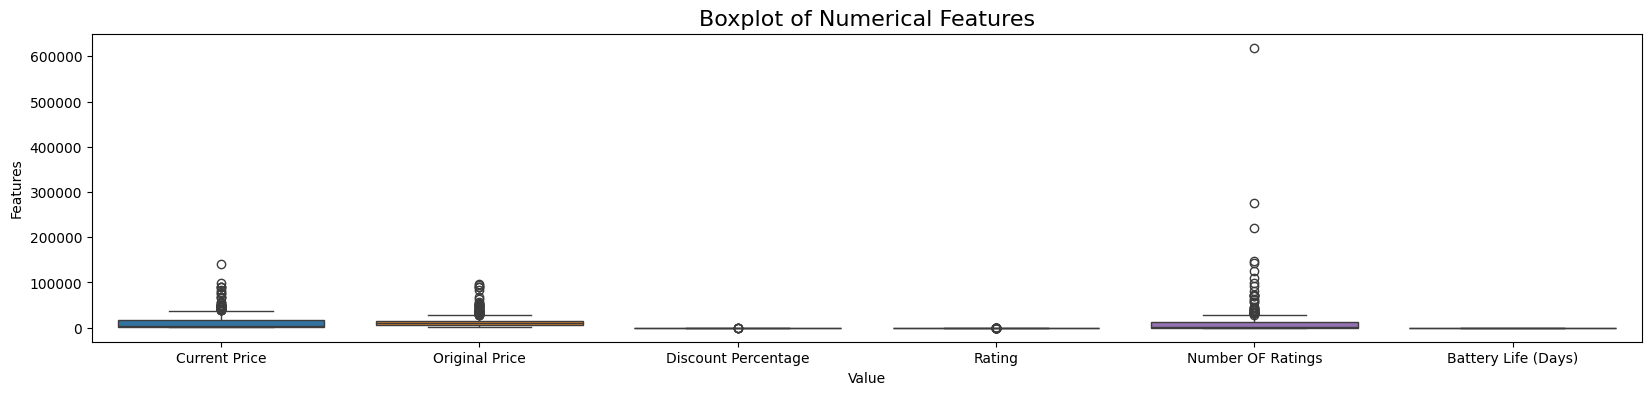

In [15]:
plt.figure(figsize=(20,4))
sns.boxplot(data=df)
plt.xlabel('Value')
plt.ylabel('Features')
plt.title('Boxplot of Numerical Features', fontsize=16)
plt.show()

In [16]:
df.columns

Index(['Brand', 'Current Price', 'Original Price', 'Discount Percentage',
       'Rating', 'Number OF Ratings', 'Model Name', 'Dial Shape',
       'Strap Color', 'Strap Material', 'Touchscreen', 'Battery Life (Days)',
       'Bluetooth', 'Display Size', 'Weight'],
      dtype='object')

In [17]:
# Handling outliers in 'Current Price' using IQR
Q1 = df['Current Price'].quantile(0.25)
Q3 = df['Current Price'].quantile(0.75)

In [18]:
IQR = Q3 - Q1

In [19]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['Current Price'] = df['Current Price'].clip(lower=lower_bound, upper=upper_bound)

In [20]:
# Handling outliers in 'Original Price' using IQR
Q1 = df['Original Price'].quantile(0.25)
Q3 = df['Original Price'].quantile(0.75)

In [21]:
IQR = Q3 - Q1

In [22]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['Original Price'] = df['Original Price'].clip(lower=lower_bound, upper=upper_bound)

In [23]:
# Handling outliers in 'Original Price' using IQR
Q1 = df['Number OF Ratings'].quantile(0.25)
Q3 = df['Number OF Ratings'].quantile(0.75)


In [24]:
IQR = Q3 - Q1

In [25]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['Number OF Ratings'] = df['Number OF Ratings'].clip(lower=lower_bound, upper=upper_bound)

In [26]:

df.columns

Index(['Brand', 'Current Price', 'Original Price', 'Discount Percentage',
       'Rating', 'Number OF Ratings', 'Model Name', 'Dial Shape',
       'Strap Color', 'Strap Material', 'Touchscreen', 'Battery Life (Days)',
       'Bluetooth', 'Display Size', 'Weight'],
      dtype='object')

In [27]:
# Handling outliers in 'Discount Percentage' using IQR
Q1 = df['Discount Percentage'].quantile(0.25)
Q3 = df['Discount Percentage'].quantile(0.75)
IQR = Q3 - Q1


In [28]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['Discount Percentage'] = df['Discount Percentage'].clip(lower=lower_bound, upper=upper_bound)

In [29]:
# Handling outliers in 'Rating' using IQR
Q1 = df['Rating'].quantile(0.25)
Q3 = df['Rating'].quantile(0.75)
IQR = Q3 - Q1

In [30]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [31]:
df['Rating'] = df['Rating'].clip(lower=lower_bound, upper=upper_bound)

Outlier detection and handling using log transformation method

In [32]:
# import numpy as np

In [33]:
# #defining columns
# log_transform_cols = ['Current Price', 'Original Price', 'Number OF Ratings', 'Discount Percentage']

In [34]:
# for col in log_transform_cols:
#     if df[col].min() <= 0:
#         df[col] = df[col] + abs(df[col].min()) + 1 

In [35]:
# df[log_transform_cols] = np.log(df[log_transform_cols])

Data Scaling and Transformation

In [36]:
# # Scaling numerical features
# scaler = StandardScaler()

In [37]:
# df[num_cols] = scaler.fit_transform(df[num_cols])

Handling Duplicates

In [44]:
# Droping duplicate rows
df = df.drop_duplicates()

Encoding Categorical Values


In [50]:
# Using LabelEncoder for simple encoding
encoder = LabelEncoder()
for col in cat_cols:
    df[col] = encoder.fit_transform(df[col])

 Dealing with Inconsistent Data

In [51]:
df.columns,df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 440 entries, 0 to 449
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                440 non-null    int64  
 1   Current Price        440 non-null    float64
 2   Original Price       440 non-null    float64
 3   Discount Percentage  440 non-null    float64
 4   Rating               440 non-null    float64
 5   Number OF Ratings    440 non-null    float64
 6   Model Name           440 non-null    int64  
 7   Dial Shape           440 non-null    int64  
 8   Strap Color          440 non-null    int64  
 9   Strap Material       440 non-null    int64  
 10  Touchscreen          440 non-null    int64  
 11  Battery Life (Days)  440 non-null    float64
 12  Bluetooth            440 non-null    int64  
 13  Display Size         440 non-null    int64  
 14  Weight               440 non-null    int64  
dtypes: float64(6), int64(9)
memory usage: 55.0 KB

(Index(['Brand', 'Current Price', 'Original Price', 'Discount Percentage',
        'Rating', 'Number OF Ratings', 'Model Name', 'Dial Shape',
        'Strap Color', 'Strap Material', 'Touchscreen', 'Battery Life (Days)',
        'Bluetooth', 'Display Size', 'Weight'],
       dtype='object'),
 None)

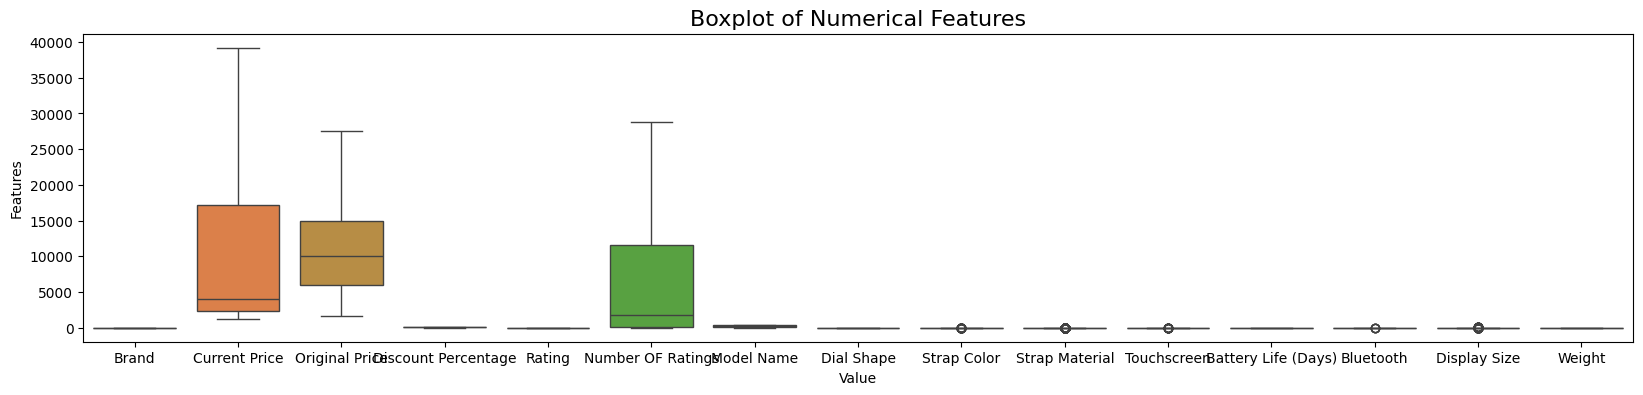

In [55]:
plt.figure(figsize=(20,4))
sns.boxplot(data=df)
plt.xlabel('Value')
plt.ylabel('Features')
plt.title('Boxplot of Numerical Features', fontsize=16)
plt.show()